In [21]:
import numpy as np
import cv2

# 圖片灰階梯度化

# load the image and convert it to grayscale
#image = cv2.imread('G:/OpenCV_test-master/OpenCV_test-master/7elevenLogo.jpg')
image = cv2.imread('G:/OpenCV_test-master/OpenCV_test-master/7elevenTest2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# compute the Scharr gradient magnitude representation of the images
# in both the x and y direction
gradX = cv2.Sobel(gray, ddepth = cv2.cv.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.cv.CV_32F, dx = 0, dy = 1, ksize = -1)

# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

cv2.imshow('gradient',gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()  

In [10]:
from matplotlib import pyplot as plt

# SURF找特徵

surf = cv2.SURF(400)
#Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(gradient,None)
len(kp)

# Check present Hessian threshold
print surf.hessianThreshold

# We set it to some 50000. Remember, it is just for representing in picture.
# In actual cases, it is better to have a value 300-500
surf.hessianThreshold = 10000  #越小越細節

# Again compute keypoints and check its number.
kp, des = surf.detectAndCompute(gradient,None)

print len(kp)

img2 = cv2.drawKeypoints(gradient,kp,None,(255,0,0),4)
plt.imshow(img2),plt.show()

400.0
129


(<matplotlib.image.AxesImage at 0x3d4bf28>, None)

In [24]:
# 將上面兩段程式定義成方法
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

def gradient_im(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gradX = cv2.Sobel(gray, ddepth = cv2.cv.CV_32F, dx = 1, dy = 0, ksize = -1)
    gradY = cv2.Sobel(gray, ddepth = cv2.cv.CV_32F, dx = 0, dy = 1, ksize = -1)
    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)
    return gradient

def surf_features(img_object):
    surf = cv2.SURF(400)
    surf.hessianThreshold = 10000
    kp, des = surf.detectAndCompute(img_object,None)
    keypoints_img = cv2.drawKeypoints(img_object,kp,None,(255,0,0),4)
    return kp, des

In [30]:
def drawMatches(img1, kp1, img2, kp2, matches):
    """
    My own implementation of cv2.drawMatches as OpenCV 2.4.9
    does not have this function available but it's supported in
    OpenCV 3.0.0

    This function takes in two images with their associated 
    keypoints, as well as a list of DMatch data structure (matches) 
    that contains which keypoints matched in which images.

    An image will be produced where a montage is shown with
    the first image followed by the second image beside it.

    Keypoints are delineated with circles, while lines are connected
    between matching keypoints.

    img1,img2 - Grayscale images
    kp1,kp2 - Detected list of keypoints through any of the OpenCV keypoint 
              detection algorithms
    matches - A list of matches of corresponding keypoints through any
              OpenCV keypoint matching algorithm
    """

    # Create a new output image that concatenates the two images together
    # (a.k.a) a montage
    rows1 = img1.shape[0]
    cols1 = img1.shape[1]
    rows2 = img2.shape[0]
    cols2 = img2.shape[1]

    out = np.zeros((max([rows1,rows2]),cols1+cols2,3), dtype='uint8')

    # Place the first image to the left
    out[:rows1,:cols1] = np.dstack([img1, img1, img1])

    # Place the next image to the right of it
    out[:rows2,cols1:] = np.dstack([img2, img2, img2])

    # For each pair of points we have between both images
    # draw circles, then connect a line between them
    for mat in matches:

        # Get the matching keypoints for each of the images
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx

        # x - columns
        # y - rows
        (x1,y1) = kp1[img1_idx].pt
        (x2,y2) = kp2[img2_idx].pt

        # Draw a small circle at both co-ordinates
        # radius 4
        # colour blue
        # thickness = 1
        cv2.circle(out, (int(x1),int(y1)), 4, (255, 0, 0), 1)   
        cv2.circle(out, (int(x2)+cols1,int(y2)), 4, (255, 0, 0), 1)

        # Draw a line in between the two points
        # thickness = 1
        # colour blue
        cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), (255, 0, 0), 1)


    # Show the image
    #cv2.imshow('Matched Features', out)
    #cv2.waitKey(0)
    #cv2.destroyWindow('Matched Features')

    # Also return the image if you'd like a copy
    return out

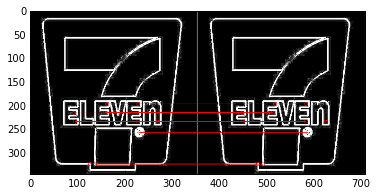

In [33]:
# main執行段
# SURF matching

path1 = 'G:/OpenCV_test-master/OpenCV_test-master/7elevenLogo.jpg'
path2 = 'G:/OpenCV_test-master/OpenCV_test-master/7elevenLogo.jpg'

img1 = cv2.imread(path1)
img2 = cv2.imread(path2)

gradient_img1 = gradient_im(img1)
gradient_img2 = gradient_im(img2)

kp1, des1 = surf_features(gradient_img1)
kp2, des2 = surf_features(gradient_img2)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = drawMatches(gradient_img1,kp1,gradient_img2,kp2,matches[:10])

plt.imshow(img3)
plt.show()

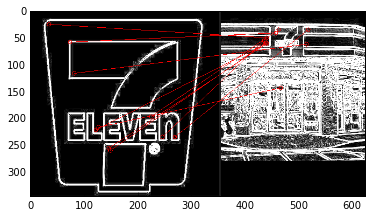

In [36]:
path1 = 'G:/OpenCV_test-master/OpenCV_test-master/7elevenLogo.jpg'
path2 = 'G:/OpenCV_test-master/OpenCV_test-master/7elevenTest2.jpg'

img1 = cv2.imread(path1)
img2 = cv2.imread(path2)

gradient_img1 = gradient_im(img1)
gradient_img2 = gradient_im(img2)

kp1, des1 = surf_features(gradient_img1)
kp2, des2 = surf_features(gradient_img2)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = drawMatches(gradient_img1,kp1,gradient_img2,kp2,matches[:10])

plt.imshow(img3)
plt.show()